In [1]:
import os
os.chdir("..")

import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [2]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import ks_2samp

In [3]:
def p_value_string(p_value):
    string_list = ["-", "*", "**", "***"]
    p_value_th_list = [0.05, 0.01, 0.001, 0]
    for p_str, p_th in zip(string_list, p_value_th_list):
        if p_value >= p_th:
            return p_str

In [4]:
metrics_skm_list = ["accuracy", "kappa", "f1_score"]
dataset_list = ["Adult", "Maternal", "Titanic", "Wisconsin", "WineQuality", "StudentDropout"]

In [5]:
result_file_list = os.listdir("Results/")

Adult


,model_name,accuracy,kappa,f1_score
0,LinearNN-iqr-covmat-integral,0.613750,0.228909,0.589697
1,SDV-TVAESynthesizer,0.725717,0.451207,0.711729
2,LinearNN-both-loss_iqr-covmat-integral,0.763100,0.526007,0.757372
3,SDV-CTGANSynthesizer,0.768375,0.535962,0.768575
4,SDV-CopulaGANSynthesizer,0.876158,0.751912,0.876309
5,SDV-GaussianCopulaSynthesizer,0.942683,0.885150,0.946571
6,LinearNN-BCELoss,0.999000,0.997992,0.999004
7,CNN1D-both-loss_iqr-covmat-integral,0.999208,0.998410,0.999215
8,CNN1D-BCELoss,0.999233,0.998461,0.999230
9,CNN1D-iqr-covmat-integral,0.999517,0.999030,0.999525


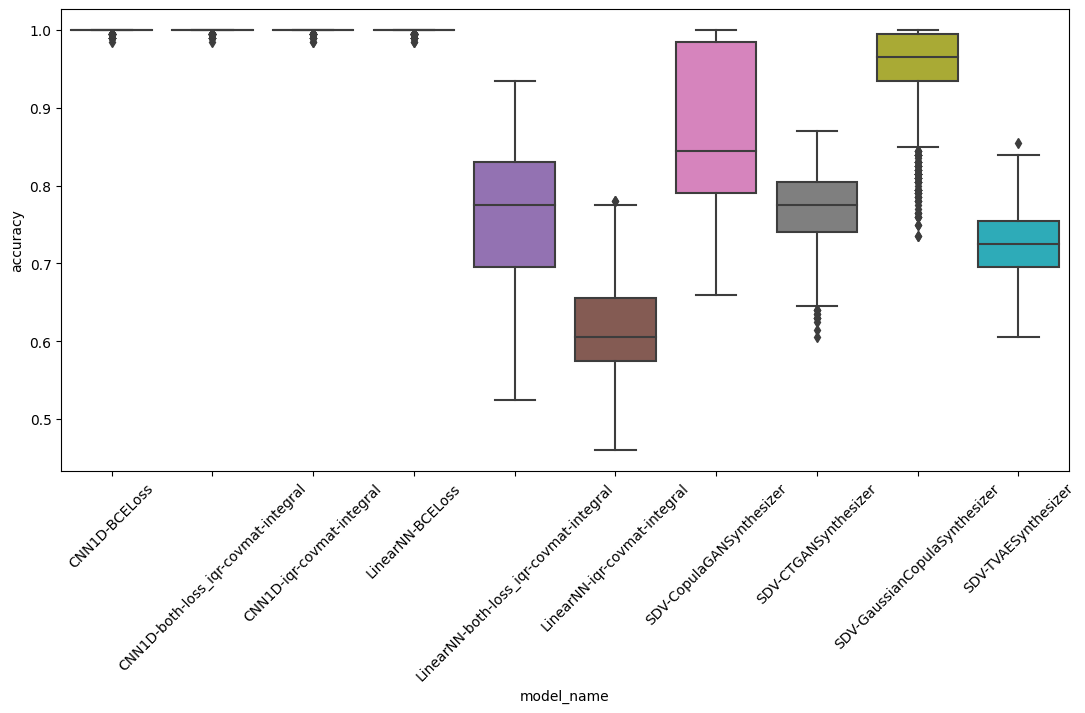

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
CNN1D-BCELoss,-,-,-,-,***,***,***,***,***,***
CNN1D-both-loss_iqr-covmat-integral,-,-,-,-,***,***,***,***,***,***
CNN1D-iqr-covmat-integral,-,-,-,*,***,***,***,***,***,***
LinearNN-BCELoss,-,-,*,-,***,***,***,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***,***,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***,***,***,***
SDV-CopulaGANSynthesizer,***,***,***,***,***,***,-,***,***,***
SDV-CTGANSynthesizer,***,***,***,***,***,***,***,-,***,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,***,***,-,***
SDV-TVAESynthesizer,***,***,***,***,***,***,***,***,***,-


Maternal


,model_name,accuracy,kappa,f1_score
0,SDV-GaussianCopulaSynthesizer,0.592092,0.186439,0.592726
1,LinearNN-iqr-covmat-integral,0.610483,0.224163,0.591571
2,LinearNN-both-loss_iqr-covmat-integral,0.617367,0.236169,0.611112
3,CNN1D-iqr-covmat-integral,0.963117,0.925971,0.962365
4,CNN1D-both-loss_iqr-covmat-integral,0.982750,0.965379,0.982461
5,CNN1D-BCELoss,0.989825,0.979568,0.989664
6,LinearNN-BCELoss,0.991442,0.982816,0.991363


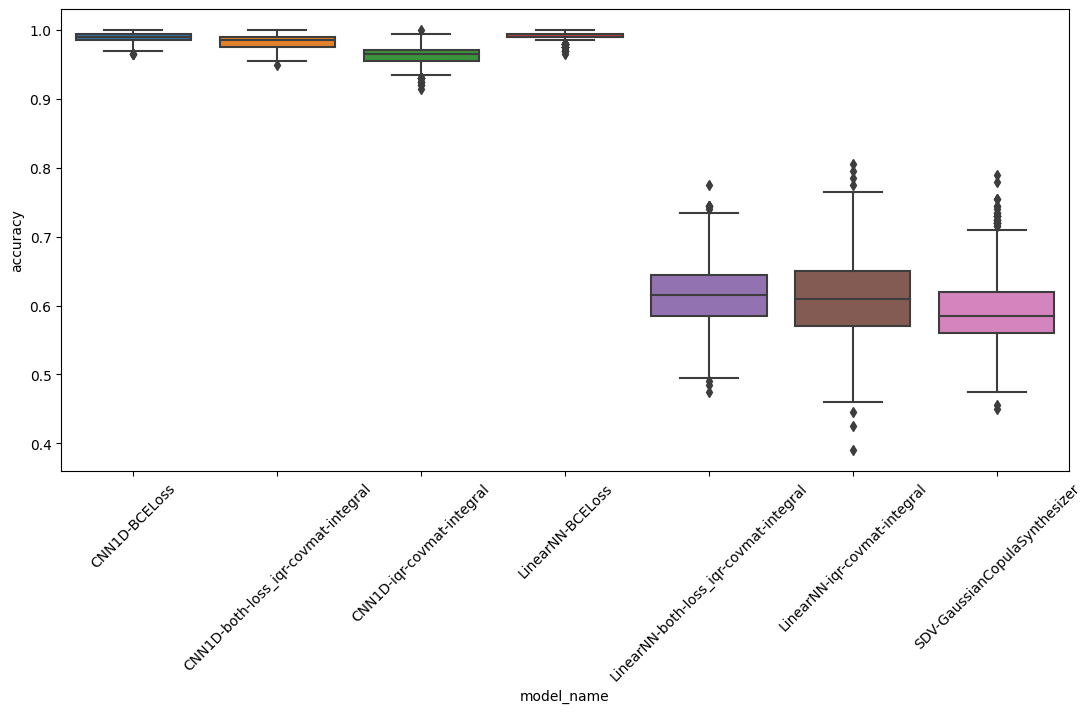

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer
CNN1D-BCELoss,-,***,***,*,***,***,***
CNN1D-both-loss_iqr-covmat-integral,***,-,***,***,***,***,***
CNN1D-iqr-covmat-integral,***,***,-,***,***,***,***
LinearNN-BCELoss,*,***,***,-,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,-


Titanic


,model_name,accuracy,kappa,f1_score
0,SDV-GaussianCopulaSynthesizer,0.570350,0.143744,0.572142
1,LinearNN-iqr-covmat-integral,0.582400,0.167345,0.572816
2,LinearNN-both-loss_iqr-covmat-integral,0.619042,0.239624,0.616223
3,SDV-TVAESynthesizer,0.643350,0.287242,0.612868
4,SDV-CopulaGANSynthesizer,0.733675,0.467062,0.734460
5,SDV-CTGANSynthesizer,0.745033,0.489604,0.746671
6,LinearNN-BCELoss,0.996100,0.992171,0.996089
7,CNN1D-BCELoss,0.996183,0.992334,0.996148
8,CNN1D-both-loss_iqr-covmat-integral,0.997208,0.994396,0.997195
9,CNN1D-iqr-covmat-integral,0.998358,0.996705,0.998355


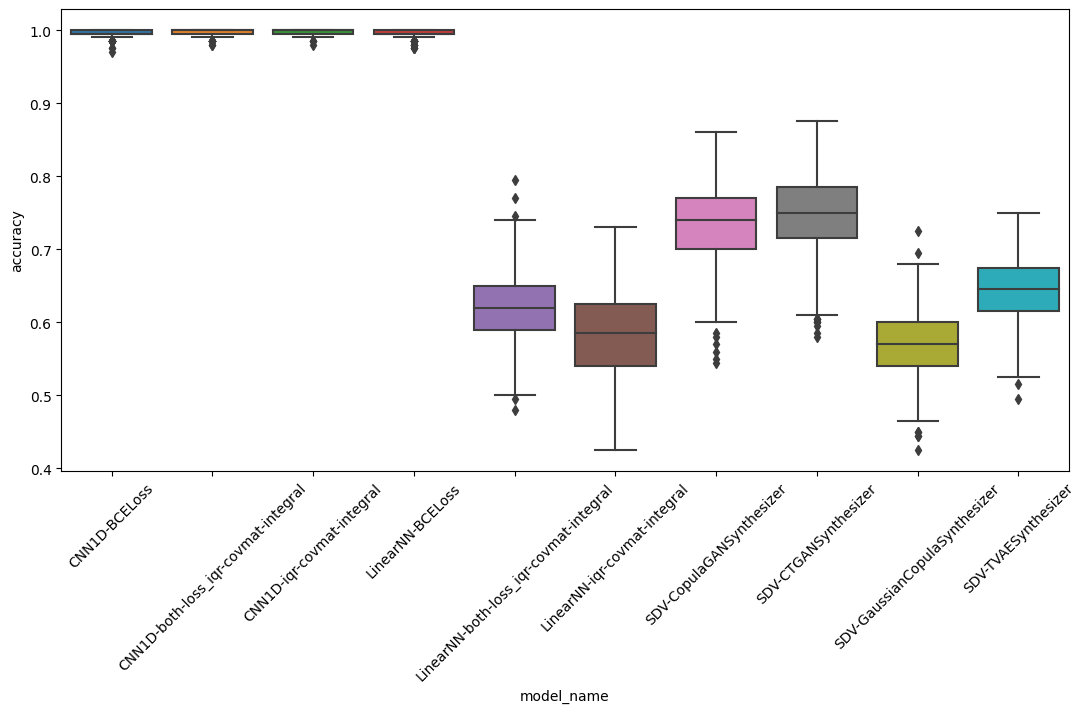

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
CNN1D-BCELoss,-,***,***,-,***,***,***,***,***,***
CNN1D-both-loss_iqr-covmat-integral,***,-,***,**,***,***,***,***,***,***
CNN1D-iqr-covmat-integral,***,***,-,***,***,***,***,***,***,***
LinearNN-BCELoss,-,**,***,-,***,***,***,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***,***,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***,***,***,***
SDV-CopulaGANSynthesizer,***,***,***,***,***,***,-,**,***,***
SDV-CTGANSynthesizer,***,***,***,***,***,***,**,-,***,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,***,***,-,***
SDV-TVAESynthesizer,***,***,***,***,***,***,***,***,***,-


Wisconsin


,model_name,accuracy,kappa,f1_score
0,SDV-GaussianCopulaSynthesizer,0.558417,0.121728,0.553915
1,LinearNN-both-loss_iqr-covmat-integral,0.601408,0.205018,0.598281
2,SDV-TVAESynthesizer,0.602550,0.207103,0.561492
3,LinearNN-iqr-covmat-integral,0.619158,0.241046,0.632374
4,SDV-CTGANSynthesizer,0.755417,0.510683,0.764610
5,SDV-CopulaGANSynthesizer,0.784817,0.569180,0.793088
6,LinearNN-BCELoss,0.995900,0.991773,0.995864
7,CNN1D-iqr-covmat-integral,0.996625,0.993225,0.996593
8,CNN1D-both-loss_iqr-covmat-integral,0.997033,0.994042,0.996997
9,CNN1D-BCELoss,0.997550,0.995079,0.997543


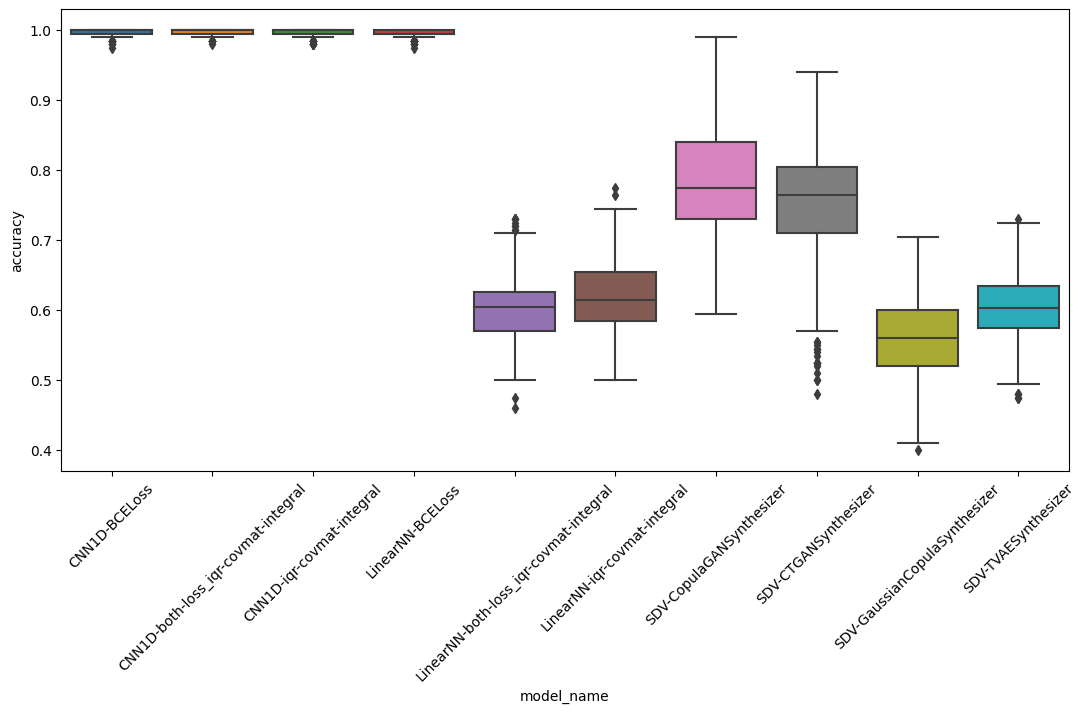

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
CNN1D-BCELoss,-,*,***,***,***,***,***,***,***,***
CNN1D-both-loss_iqr-covmat-integral,*,-,-,*,***,***,***,***,***,***
CNN1D-iqr-covmat-integral,***,-,-,-,***,***,***,***,***,***
LinearNN-BCELoss,***,*,-,-,***,***,***,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***,***,***,-
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***,***,***,***
SDV-CopulaGANSynthesizer,***,***,***,***,***,***,-,***,***,***
SDV-CTGANSynthesizer,***,***,***,***,***,***,***,-,***,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,***,***,-,***
SDV-TVAESynthesizer,***,***,***,***,-,***,***,***,***,-


WineQuality


,model_name,accuracy,kappa,f1_score
0,LinearNN-iqr-covmat-integral,0.682333,0.365003,0.675459
1,SDV-TVAESynthesizer,0.684850,0.369598,0.675785
2,LinearNN-both-loss_iqr-covmat-integral,0.728483,0.456658,0.727129
3,SDV-GaussianCopulaSynthesizer,0.834342,0.670409,0.832231
4,SDV-CTGANSynthesizer,0.847608,0.694515,0.850963
5,SDV-CopulaGANSynthesizer,0.911833,0.823371,0.913166
6,LinearNN-BCELoss,0.999667,0.999331,0.999666
7,CNN1D-BCELoss,0.999867,0.999732,0.999867
8,CNN1D-iqr-covmat-integral,0.999867,0.999733,0.999866
9,CNN1D-both-loss_iqr-covmat-integral,0.999933,0.999866,0.999932


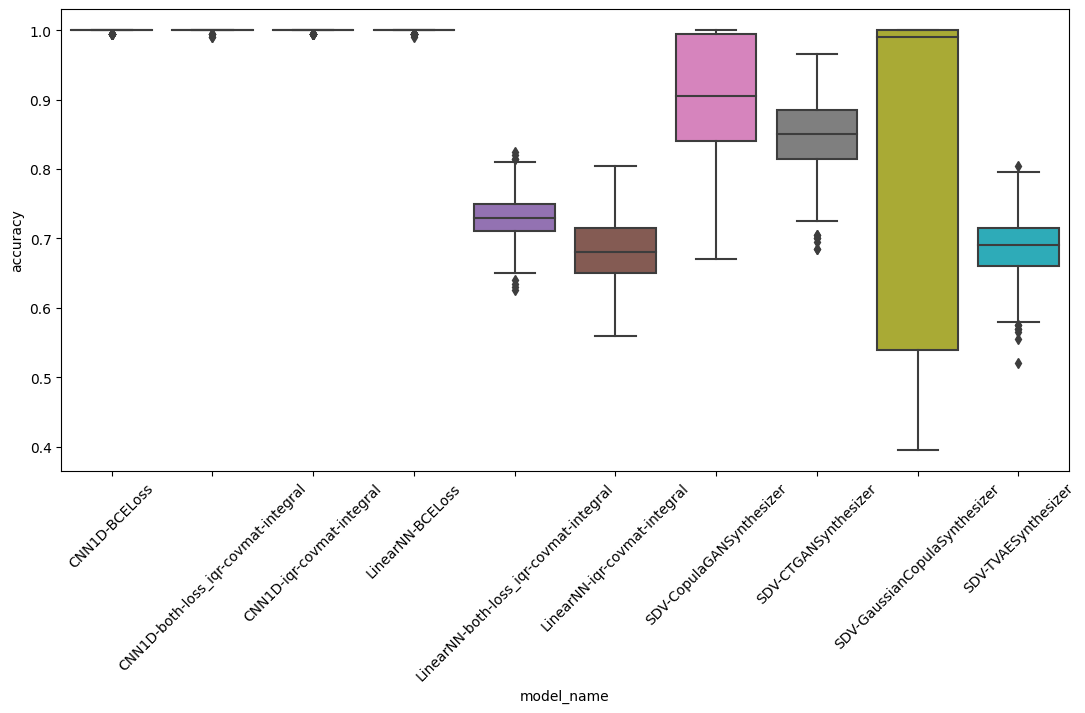

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
CNN1D-BCELoss,-,-,-,-,***,***,***,***,***,***
CNN1D-both-loss_iqr-covmat-integral,-,-,-,-,***,***,***,***,***,***
CNN1D-iqr-covmat-integral,-,-,-,-,***,***,***,***,***,***
LinearNN-BCELoss,-,-,-,-,***,***,***,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***,***,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***,***,***,-
SDV-CopulaGANSynthesizer,***,***,***,***,***,***,-,***,***,***
SDV-CTGANSynthesizer,***,***,***,***,***,***,***,-,***,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,***,***,-,***
SDV-TVAESynthesizer,***,***,***,***,***,-,***,***,***,-


StudentDropout


,model_name,accuracy,kappa,f1_score
0,LinearNN-iqr-covmat-integral,0.779817,0.559140,0.760080
1,LinearNN-both-loss_iqr-covmat-integral,0.837242,0.674011,0.828413
2,SDV-GaussianCopulaSynthesizer,0.997642,0.995264,0.997621
3,CNN1D-iqr-covmat-integral,0.999792,0.999582,0.999789
4,LinearNN-BCELoss,0.999817,0.999632,0.999820
5,CNN1D-both-loss_iqr-covmat-integral,0.999858,0.999715,0.999860
6,CNN1D-BCELoss,0.999908,0.999816,0.999909


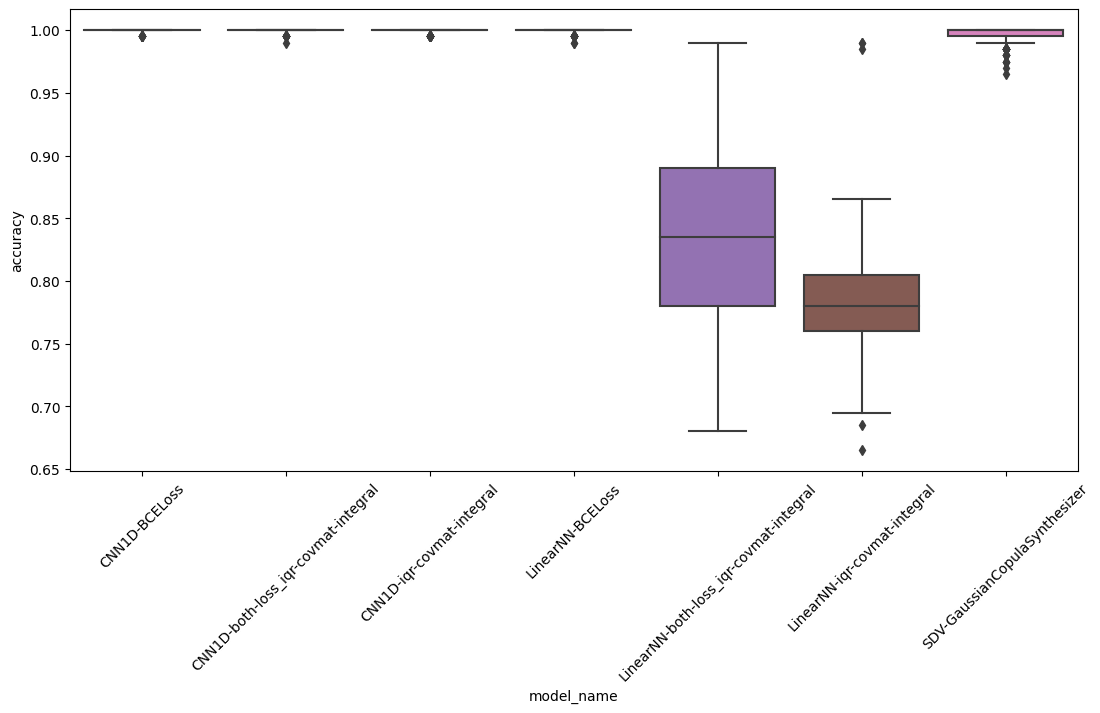

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer
CNN1D-BCELoss,-,-,-,-,***,***,***
CNN1D-both-loss_iqr-covmat-integral,-,-,-,-,***,***,***
CNN1D-iqr-covmat-integral,-,-,-,-,***,***,***
LinearNN-BCELoss,-,-,-,-,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,-


In [6]:
for data_name in dataset_list:
    selected_files = [f for f in result_file_list if data_name in f]

    result_load_dict = {}
    for file_name in selected_files:
        with open(f"Results/{file_name}", 'rb') as f:
            result_load_dict.update({file_name.split(".")[0]: pickle.load(f)})

    print(data_name)

    distribution_list = []
    help_list = []
    for k, v in result_load_dict.items():
        df_res_ml = v["ml_difference_real_generated_data"]
        
        if not any([metric in df_res_ml.columns for metric in metrics_skm_list]):
            continue
        
        model_name = "_".join(k.split("_")[2:])
        dict_help = {"model_name": model_name}
        dict_help.update(
            {k: v for k, v in df_res_ml[metrics_skm_list].mean().to_dict().items()}
        )
        help_list.append(dict_help)
        
        df_res_ml["model_name"] = model_name
        distribution_list.append(df_res_ml)

    df_dist = pd.concat(distribution_list, ignore_index=True)
    
    df_result_summary = pd.DataFrame(help_list).sort_values("accuracy").reset_index(drop=True)
    display(df_result_summary)
    
    plt.figure(figsize=(13, 6))
    sns.boxplot(data=df_dist, x="model_name", y="accuracy")
    plt.xticks(rotation=45)
    plt.show()
    
    model_tuple_list = []
    for i, m_name_i in enumerate(df_dist["model_name"].unique()[:-1]):
        for m_name_j in df_dist["model_name"].unique()[(i+1):]:
            model_tuple_list.append([m_name_i, m_name_j])

    p_value_matrix = pd.DataFrame("-", index=df_dist["model_name"].unique(), columns=df_dist["model_name"].unique())

    for model1, model2 in model_tuple_list:
        metric = "accuracy"
        value_model1 = df_dist[df_dist["model_name"] == model1][metric].values
        value_model2 = df_dist[df_dist["model_name"] == model2][metric].values
        
        _, p_value = ks_2samp(value_model1, value_model2)
        
        p_value_matrix.loc[model1, model2] = p_value_string(p_value)
        p_value_matrix.loc[model2, model1] = p_value_string(p_value)

    display(p_value_matrix)

In [7]:
for data_name in dataset_list:
    selected_files = [f for f in result_file_list if data_name in f]

    result_load_dict = {}
    for file_name in selected_files:
        with open(f"Results/{file_name}", 'rb') as f:
            result_load_dict.update({file_name.split(".")[0]: pickle.load(f)})

    print(data_name)
    
    help_list = []
    for k, v in result_load_dict.items():
        df_res_ml = v.get("ml_train_model_comparison", None)
        
        if df_res_ml is None:
            continue
        
        dict_help = {"model_name": "_".join(k.split("_")[2:])}
        dict_help.update(
            {k: v for k, v in df_res_ml.mean().to_dict().items()}
        )
        help_list.append(dict_help)

    df_result_summary = pd.DataFrame(help_list).sort_values("accuracy_train_realgen_test_real", ascending=False).reset_index(drop=True)
    display(df_result_summary.T)

Adult


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,LinearNN-BCELoss,CNN1D-iqr-covmat-integral,SDV-CTGANSynthesizer,LinearNN-both-loss_iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,CNN1D-BCELoss,SDV-CopulaGANSynthesizer,CNN1D-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral
accuracy_train_real_test_real,0.827458,0.822867,0.823633,0.829575,0.825075,0.827525,0.828292,0.832708,0.829067,0.826075
kappa_train_real_test_real,0.468678,0.457756,0.452864,0.46761,0.458403,0.46598,0.46582,0.457523,0.4701,0.457856
f1_score_train_real_test_real,0.571101,0.563308,0.556957,0.567925,0.561824,0.568129,0.567221,0.55411,0.570927,0.560269
accuracy_train_realgen_test_real,0.819875,0.806092,0.804333,0.803767,0.801708,0.800458,0.798067,0.796475,0.792058,0.772683
kappa_train_realgen_test_real,0.477446,0.415933,0.416828,0.27373,0.355669,0.298269,0.362948,0.196647,0.36056,0.28369
f1_score_train_realgen_test_real,0.591279,0.53395,0.538109,0.34191,0.463579,0.385485,0.479542,0.252822,0.484686,0.415131
accuracy_train_gen_test_real,0.762942,0.762008,0.786958,0.757408,0.70725,0.767617,NaN,0.767242,0.711992,0.623208
kappa_train_gen_test_real,0.39321,0.027638,0.244363,0.019284,0.167933,0.064229,NaN,0.010517,0.032478,0.025003
f1_score_train_gen_test_real,0.551363,0.035772,0.324063,0.044473,0.354278,0.087674,NaN,0.022057,0.168024,0.275125


Maternal


,0,1,2,3,4,5,6
model_name,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral
accuracy_train_real_test_real,0.863092,0.854767,0.860858,0.852892,0.861175,0.855217,0.855392
kappa_train_real_test_real,0.615267,0.597686,0.61344,0.590539,0.608138,0.593197,0.597447
f1_score_train_real_test_real,0.701199,0.689598,0.701103,0.683225,0.694864,0.683682,0.688431
accuracy_train_realgen_test_real,0.859717,0.858992,0.840892,0.839083,0.8149,0.801908,0.7858
kappa_train_realgen_test_real,0.609613,0.615196,0.575121,0.523638,0.474437,0.426662,0.331002
f1_score_train_realgen_test_real,0.698788,0.7063,0.679377,0.614451,0.588649,0.544548,0.435193
accuracy_train_gen_test_real,0.42985,0.848375,0.733883,0.810542,NaN,NaN,NaN
kappa_train_gen_test_real,0.125699,0.599549,0.343834,0.397743,NaN,NaN,NaN
f1_score_train_gen_test_real,0.475437,0.70008,0.526818,0.483351,NaN,NaN,NaN


Titanic


,0,1,2,3,4,5,6,7,8,9
model_name,LinearNN-iqr-covmat-integral,CNN1D-both-loss_iqr-covmat-integral,LinearNN-BCELoss,SDV-TVAESynthesizer,CNN1D-BCELoss,SDV-GaussianCopulaSynthesizer,SDV-CopulaGANSynthesizer,CNN1D-iqr-covmat-integral,SDV-CTGANSynthesizer,LinearNN-both-loss_iqr-covmat-integral
accuracy_train_real_test_real,0.795233,0.791942,0.790383,0.785842,0.783717,0.7764,0.793533,0.785,0.796983,0.790908
kappa_train_real_test_real,0.56805,0.559055,0.560701,0.551223,0.544874,0.5296,0.562531,0.547884,0.570421,0.561071
f1_score_train_real_test_real,0.734928,0.726732,0.733885,0.727875,0.721621,0.712735,0.729301,0.723591,0.734557,0.733707
accuracy_train_gen_test_real,0.741025,0.674992,0.66645,0.764517,0.650533,0.744283,0.557675,0.7267,0.54395,0.612175
kappa_train_gen_test_real,0.466217,0.3511,0.208811,0.514184,0.167436,0.431377,0.026683,0.415263,0.012208,0.182931
f1_score_train_gen_test_real,0.687476,0.639786,0.300316,0.715444,0.257404,0.595422,0.227233,0.623549,0.221072,0.496056
accuracy_train_realgen_test_real,0.794067,0.783817,0.782233,0.778092,0.775417,0.773342,0.771892,0.770492,0.742817,0.731983
kappa_train_realgen_test_real,0.567145,0.546394,0.54461,0.538255,0.530726,0.511378,0.499649,0.522064,0.426592,0.437722
f1_score_train_realgen_test_real,0.736524,0.724485,0.725242,0.724714,0.717517,0.683293,0.660475,0.714299,0.589967,0.658552


Wisconsin


,0,1,2,3,4,5,6,7,8,9
model_name,LinearNN-both-loss_iqr-covmat-integral,SDV-TVAESynthesizer,LinearNN-BCELoss,LinearNN-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,CNN1D-both-loss_iqr-covmat-integral,CNN1D-BCELoss,CNN1D-iqr-covmat-integral,SDV-CTGANSynthesizer,SDV-CopulaGANSynthesizer
accuracy_train_real_test_real,0.954192,0.9574,0.955658,0.952817,0.95445,0.953275,0.95205,0.954783,0.954667,0.953958
kappa_train_real_test_real,0.900895,0.907377,0.903557,0.89689,0.901186,0.898186,0.896228,0.902533,0.901867,0.899842
f1_score_train_real_test_real,0.937199,0.940905,0.938395,0.933698,0.937092,0.934748,0.934179,0.93849,0.9377,0.935979
accuracy_train_gen_test_real,0.928775,0.909408,0.807175,0.916567,0.904167,0.721742,0.845125,0.697958,0.641258,0.614658
kappa_train_gen_test_real,0.843534,0.810737,0.619999,0.810849,0.784255,0.29185,0.634853,0.253782,0.137683,0.13616
f1_score_train_gen_test_real,0.898165,0.88556,0.768888,0.871417,0.853902,0.394396,0.72391,0.376625,0.245275,0.307322
accuracy_train_realgen_test_real,0.95185,0.946742,0.938217,0.936333,0.93495,0.931383,0.931125,0.904908,0.8914,0.86805
kappa_train_realgen_test_real,0.895534,0.886074,0.865331,0.858019,0.855758,0.848551,0.849921,0.790121,0.75285,0.692775
f1_score_train_realgen_test_real,0.933492,0.928939,0.913656,0.905892,0.904925,0.901045,0.90382,0.862072,0.8298,0.778504


WineQuality


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,CNN1D-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,CNN1D-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,CNN1D-BCELoss,LinearNN-both-loss_iqr-covmat-integral,SDV-CTGANSynthesizer,LinearNN-BCELoss
accuracy_train_real_test_real,0.964733,0.964125,0.963233,0.96195,0.961867,0.962075,0.9618,0.961125,0.960683,0.9607
kappa_train_real_test_real,0.109374,0.153465,0.089227,0.067987,0.093495,0.11478,0.101201,0.123348,0.111292,0.115795
f1_score_train_real_test_real,0.981957,0.981619,0.981188,0.980521,0.980463,0.980573,0.980424,0.980055,0.979838,0.979839
accuracy_train_realgen_test_real,0.964617,0.963908,0.963525,0.962475,0.96195,0.961708,0.961608,0.961258,0.960158,0.9567
kappa_train_realgen_test_real,0.102739,0.111238,0.048317,0.007022,0.067466,0.060317,0.069269,0.098825,0.009801,0.192675
f1_score_train_realgen_test_real,0.981897,0.98153,0.981361,0.980825,0.980526,0.980404,0.980343,0.980141,0.97962,0.977664
accuracy_train_gen_test_real,0.954521,NaN,0.951921,0.961945,NaN,0.959417,NaN,0.960846,0.959917,0.851825
kappa_train_gen_test_real,0.018413,NaN,0.070609,0.000996,NaN,0.035309,NaN,0.046223,0.002082,0.156544
f1_score_train_gen_test_real,0.976621,NaN,0.975215,0.980544,NaN,0.979208,NaN,0.979955,0.9795,0.907792


StudentDropout


,0,1,2,3,4,5,6
model_name,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral
accuracy_train_real_test_real,0.724792,0.722783,0.723042,0.721858,0.72335,0.726517,0.724475
kappa_train_real_test_real,0.278464,0.279063,0.281261,0.278529,0.27539,0.290454,0.288572
f1_score_train_real_test_real,0.43908,0.441977,0.444405,0.442853,0.436639,0.45197,0.452299
accuracy_train_realgen_test_real,0.726525,0.724292,0.723517,0.717192,0.712142,0.682842,0.616567
kappa_train_realgen_test_real,0.284326,0.283467,0.281411,0.250396,0.25903,0.221538,0.116818
f1_score_train_realgen_test_real,0.444915,0.445965,0.443599,0.404597,0.434742,0.434734,0.396278
accuracy_train_gen_test_real,NaN,NaN,NaN,0.65845,0.658967,0.520608,0.567275
kappa_train_gen_test_real,NaN,NaN,NaN,0.117177,0.002287,0.06198,0.042642
f1_score_train_gen_test_real,NaN,NaN,NaN,0.260367,0.049423,0.436669,0.366216


In [8]:
for data_name in dataset_list:
    selected_files = [f for f in result_file_list if data_name in f]

    result_load_dict = {}
    for file_name in selected_files:
        with open(f"Results/{file_name}", 'rb') as f:
            result_load_dict.update({file_name.split(".")[0]: pickle.load(f)})

    print(data_name)
    
    help_list = []
    for k, v in result_load_dict.items():
        df_res_ml = v.get("check_statistics", None)
        
        if df_res_ml is None:
            continue
        
        dict_help = {"model_name": "_".join(k.split("_")[2:])}
        dict_help.update(
            {k: v for k, v in df_res_ml.mean().to_dict().items()}
        )
        help_list.append(dict_help)

    if len(help_list) == 0:
        continue
    
    df_result_summary = pd.DataFrame(help_list).sort_values("mean_SDV_QR_score", ascending=False).reset_index(drop=True)
    display(df_result_summary.T)

Adult


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,SDV-GaussianCopulaSynthesizer,SDV-CTGANSynthesizer,SDV-CopulaGANSynthesizer,LinearNN-iqr-covmat-integral,LinearNN-both-loss_iqr-covmat-integral,LinearNN-BCELoss,CNN1D-iqr-covmat-integral,CNN1D-both-loss_iqr-covmat-integral,CNN1D-BCELoss
up_05_pvalue_Age,0.366667,0.866667,0.1,0.033333,0.5,0.066667,0.0,0.0,0.0,0.0
up_05_pvalue_Final Weight,0.266667,0.8,0.1,0.2,0.0,0.133333,0.0,0.0,0.0,0.0
up_05_pvalue_Education Number,0.333333,0.6,0.3,0.266667,0.433333,0.266667,0.0,0.533333,0.9,0.0
up_05_pvalue_Capital Gain,0.0,0.0,0.0,0.233333,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Capital Loss,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Hours Per Week,0.666667,0.766667,0.166667,0.166667,0.2,0.333333,0.0,0.0,0.0,0.0
up_05_pvalue_Work Class_numeric,0.7,0.8,0.066667,0.133333,0.633333,0.233333,0.133333,0.0,0.0,0.0
up_05_pvalue_Education_numeric,0.4,0.9,0.366667,0.2,0.366667,0.566667,0.9,0.0,0.066667,0.033333
up_05_pvalue_Marital Status_numeric,0.566667,0.966667,0.133333,0.266667,0.433333,0.6,0.766667,0.0,0.0,0.0


Maternal


,0,1,2,3,4,5,6
model_name,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,LinearNN-BCELoss,CNN1D-iqr-covmat-integral,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral
up_05_pvalue_Age,0.866667,0.433333,0.766667,0.0,0.0,0.0,0.0
up_05_pvalue_SystolicBP,0.733333,0.3,0.9,0.5,0.0,0.066667,0.0
up_05_pvalue_DiastolicBP,0.4,0.5,0.333333,0.4,0.0,0.9,0.0
up_05_pvalue_BS,0.7,0.8,0.066667,0.0,0.0,0.0,0.0
up_05_pvalue_HeartRate,0.066667,0.366667,0.7,0.0,0.0,0.0,0.0
up_05_pvalue_BodyTemp_numeric,0.233333,0.433333,0.866667,0.066667,0.0,0.0,0.0
up_05_pvalue_RiskLevel_numeric,0.233333,0.866667,0.766667,0.466667,0.0,0.0,0.0
mean_SDV_QR_score,0.883647,0.871032,0.867777,0.750282,0.643894,0.622192,0.621589


Titanic


,0,1,2,3,4,5,6,7,8,9
model_name,LinearNN-both-loss_iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,LinearNN-BCELoss,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral
up_05_pvalue_Age,0.166667,0.833333,0.433333,0.8,0.2,0.233333,0.0,0.0,0.0,0.0
up_05_pvalue_Fare,0.2,0.233333,0.033333,0.466667,0.133333,0.166667,0.0,0.0,0.0,0.0
up_05_pvalue_Pclass_numeric,0.3,0.533333,0.266667,0.2,0.233333,0.166667,0.0,0.0,0.0,0.0
up_05_pvalue_Sex_numeric,0.6,0.333333,0.333333,0.833333,0.333333,0.166667,0.0,0.5,0.0,0.0
up_05_pvalue_SibSp_numeric,0.8,0.633333,0.233333,0.733333,0.2,0.1,0.0,0.0,0.0,0.0
up_05_pvalue_Parch_numeric,0.566667,0.666667,0.6,0.9,0.2,0.1,0.233333,0.0,0.0,0.0
up_05_pvalue_Cabin_numeric,0.5,0.666667,0.2,0.866667,0.2,0.166667,0.766667,0.0,0.0,0.0
up_05_pvalue_Embarked_numeric,0.333333,0.666667,0.1,0.533333,0.133333,0.166667,0.766667,0.366667,0.2,0.0
up_05_pvalue_Survived_numeric,0.866667,0.5,0.466667,0.4,0.366667,0.366667,0.9,0.033333,0.0,0.0


Wisconsin


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-GaussianCopulaSynthesizer,LinearNN-both-loss_iqr-covmat-integral,SDV-TVAESynthesizer,LinearNN-iqr-covmat-integral,SDV-CTGANSynthesizer,SDV-CopulaGANSynthesizer,LinearNN-BCELoss,CNN1D-iqr-covmat-integral,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral
up_05_pvalue_area_mean,0.966667,0.1,0.133333,0.066667,0.1,0.2,0.0,0.0,0.0,0.0
up_05_pvalue_concavity_mean,0.866667,0.366667,0.4,0.033333,0.266667,0.066667,0.0,0.0,0.0,0.0
up_05_pvalue_concavity_se,0.8,0.433333,0.133333,0.0,0.1,0.133333,0.0,0.0,0.0,0.0
up_05_pvalue_concavity_worst,0.833333,0.4,0.3,0.166667,0.233333,0.133333,0.0,0.0,0.0,0.0
up_05_pvalue_area_se,0.766667,0.433333,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0
up_05_pvalue_diagnosis_numeric,0.4,0.566667,0.533333,0.833333,0.333333,0.133333,0.266667,0.0,0.0,0.0
mean_SDV_QR_score,0.915312,0.903796,0.881778,0.877814,0.737686,0.735603,0.643981,0.509492,0.470305,0.459918


WineQuality


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CTGANSynthesizer,SDV-CopulaGANSynthesizer,LinearNN-BCELoss,CNN1D-iqr-covmat-integral,CNN1D-both-loss_iqr-covmat-integral,CNN1D-BCELoss
up_05_pvalue_fixed acidity,0.733333,0.3,0.066667,0.666667,0.033333,0.133333,0.0,0.0,0.0,0.0
up_05_pvalue_volatile acidity,0.9,0.2,0.966667,0.133333,0.166667,0.066667,0.0,0.0,0.0,0.0
up_05_pvalue_citric acid,0.933333,0.033333,0.2,0.0,0.033333,0.1,0.0,0.0,0.0,0.0
up_05_pvalue_residual sugar,0.833333,0.3,0.0,0.0,0.266667,0.1,0.0,0.0,0.0,0.0
up_05_pvalue_chlorides,0.833333,0.7,0.866667,0.0,0.066667,0.133333,0.0,0.0,0.0,0.0
up_05_pvalue_free sulfur dioxide,0.933333,0.266667,0.0,0.0,0.1,0.166667,0.0,0.0,0.0,0.0
up_05_pvalue_total sulfur dioxide,0.933333,0.333333,0.033333,0.033333,0.133333,0.3,0.0,0.0,0.0,0.0
up_05_pvalue_density,0.8,0.766667,0.366667,0.0,0.1,0.1,0.0,0.0,0.0,0.0
up_05_pvalue_pH,0.566667,0.366667,0.833333,0.4,0.066667,0.0,0.0,0.0,0.0,0.0


StudentDropout


,0,1,2,3,4,5,6
model_name,SDV-GaussianCopulaSynthesizer,LinearNN-iqr-covmat-integral,LinearNN-both-loss_iqr-covmat-integral,LinearNN-BCELoss,CNN1D-iqr-covmat-integral,CNN1D-both-loss_iqr-covmat-integral,CNN1D-BCELoss
up_05_pvalue_Application mode,0.0,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Application order,0.066667,0.533333,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Course,0.433333,0.0,0.233333,0.0,0.0,0.0,0.0
up_05_pvalue_Daytime/evening attendance\t,0.7,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Previous qualification,0.133333,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Previous qualification (grade),0.9,0.866667,0.5,0.0,0.0,0.0,0.0
up_05_pvalue_Nacionality,0.0,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Mother's qualification,0.1,0.2,0.1,0.366667,0.0,0.0,0.0
up_05_pvalue_Father's qualification,0.0,0.166667,0.2,0.9,0.0,0.433333,0.133333
